<img src="../../important_guide_images/high_level_ml_pipeline.png"/>

# Binary Classification

# Contents
    1. Imports
    2. Fetch the Data
    3. EDA
    4. Data Preparation
        4.1 Data cleaning
            4.1.1 Missing Data
                - Removing
                - Imputing
        4.2 Handling Text and Categorical Attributes
            - Ordinal
            - Nominal
                - Binary
        4.3 Data Spliting
        4.4 Feature Scaling
        4.5 Feature Selection
        4.6 Feature Extraction
        4.7 Transformation Pipeline
    5. Models
        5.1 Model Pipeline
        5.2 Train, Predict, Evaluate using CV(use this step or below 3 steps but this step is recommended) 
        5.3 Train
        5.4 Predict
        5.5 Evaluate
    6. Fine-tune our Model
        6.1 Grid Search/ Randomised Search
        6.2 Debugging using Learning/Validation Curves

# 1. Imports

In [117]:
# Data Manipulation
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Impute
from sklearn.impute import SimpleImputer

# Data Splitting
from sklearn.model_selection import train_test_split

# Feature Scaling
from sklearn.preprocessing import StandardScaler

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Pipeline
from sklearn.pipeline import make_pipeline

# Cross-validation
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Model Evaluation
from sklearn.metrics import accuracy_score

# Fine-tuning
from sklearn.model_selection import GridSearchCV

# Model Debugging Curve Plots
from sklearn.model_selection import learning_curve, validation_curve

# Plot inline
%matplotlib inline

# Supressing Warnings
import warnings
warnings.filterwarnings("ignore")

# 2. Fetch the Data

In [67]:
file = "https://raw.githubusercontent.com/ManojKumarTiwari/ReferenceAI/master/13-Logistic-Regression/titanic_train.csv"

In [68]:
df = pd.read_csv(file)

In [69]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [71]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 3. EDA

# 4. Data Preparation

## 4.1 Data Cleaning

### 4.1.1 Missing Data 
- Removing
- Imputing

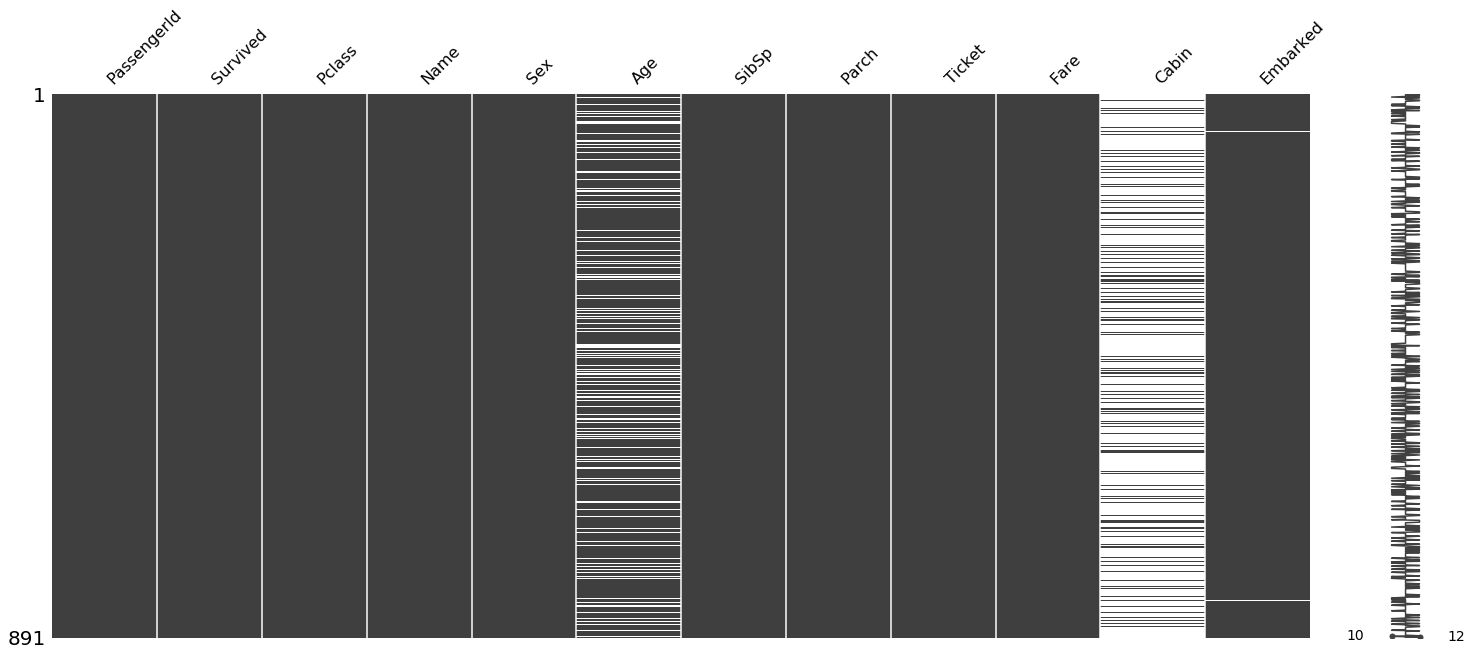

In [72]:
msno.matrix(df)

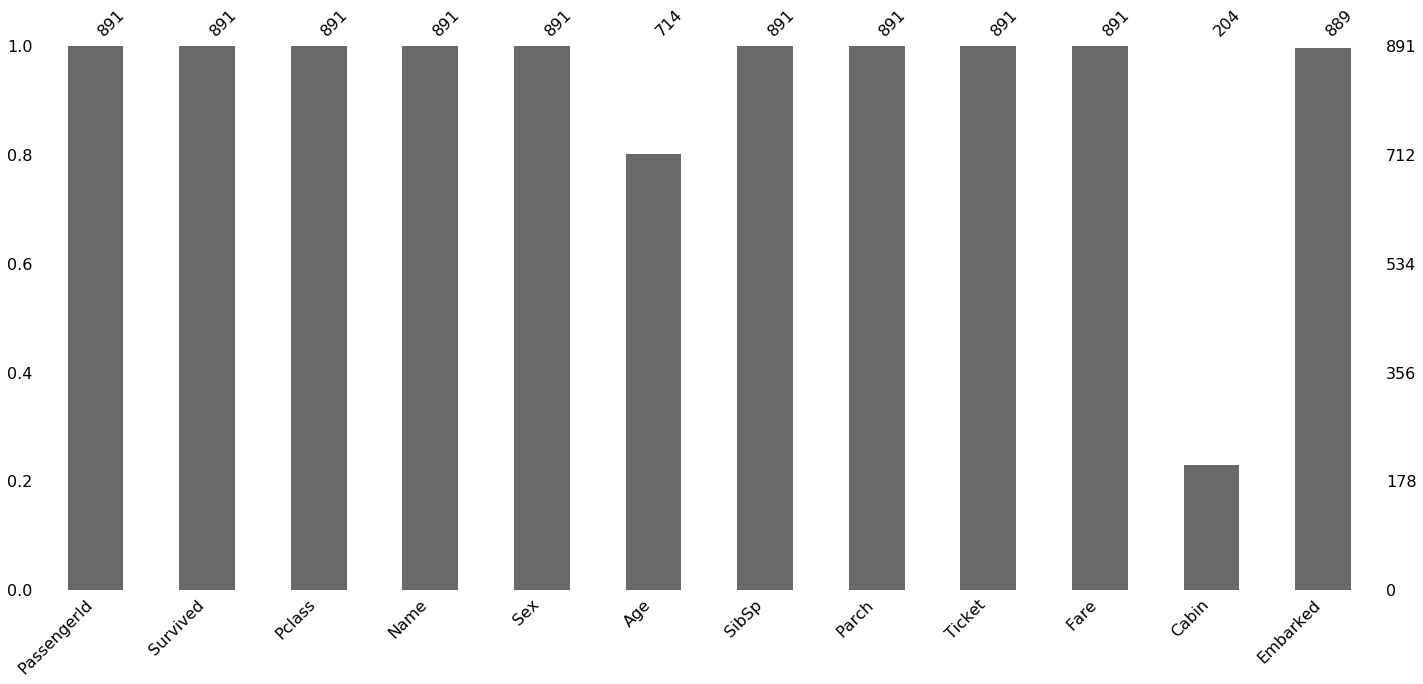

In [73]:
msno.bar(df)

In [74]:
# msno.heatmap(df)

In [75]:
# msno.dendrogram(df)

In [76]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [77]:
# Removing Cabin column
df.drop('Cabin', inplace=True, axis=1)

In [78]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [79]:
# Imputing Age with mean
df[df['Age'].isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q


In [80]:
ami = SimpleImputer()

In [81]:
amif = ami.fit(df['Age'].values.reshape(-1,1))

In [82]:
df['Age'] = amif.transform(df['Age'].values.reshape(-1,1))

In [83]:
# Removing 2 rows missing values for Embarked column
df.dropna(inplace=True)

In [84]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## 4.2 Handling Text and Categorical Attributes
- Ordinal
- Nominal
    - Binary

In [85]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [86]:
# Ordinal
df['Pclass'].value_counts()

3    491
1    214
2    184
Name: Pclass, dtype: int64

In [87]:
# Encoding Class label
df['Survived'].value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [88]:
# Nominal
# Also I'm dropping PassengerId, Name, Ticket column
df = pd.get_dummies(df[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']], drop_first=True)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


## 4.3 Data Splitting

In [89]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)

## 4.4 Feature Scaling

In [91]:
sc = StandardScaler()

In [92]:
X_train_std = sc.fit_transform(X_train)

C:\Users\mtiwari33\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\mtiwari33\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [93]:
X_test_std = sc.transform(X_test)

C:\Users\mtiwari33\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


## 4.5 Feature Selection

## 4.6 Feature Extraction

## 4.7 Transformation Pipeline

In [94]:
transform_pipe = make_pipeline(StandardScaler())

# 5. Models

## 5.1 Model Pipeline

In [95]:
# lr = LogisticRegression(C=1, solver='lbfgs', multi_class='multinomial', random_state=123)

In [96]:
lr_pipe = make_pipeline(transform_pipe, LogisticRegression(C=1, solver='lbfgs', multi_class='multinomial', random_state=123))

In [97]:
lr_transf_pipe = make_pipeline(StandardScaler(), LogisticRegression(C=1, solver='lbfgs', multi_class='multinomial', random_state=123))

In [98]:
svm = SVC(C=1, kernel='rbf', gamma=10, random_state=123)

In [99]:
dtree = DecisionTreeClassifier(max_depth=5, random_state=123)

In [100]:
forest = RandomForestClassifier(criterion='gini', n_estimators=25, random_state=123)

In [101]:
neighboor = KNeighborsClassifier(n_neighbors=3, p=2, metric='minkowski')

## 5.2 Train, Predict, Evaluate using CV

In [106]:
kfold = StratifiedKFold(n_splits=10).split(X_train, y_train)

scores = []
for k, (train, test) in enumerate(kfold):
    lr_pipe.fit(X_train.iloc[train], y_train.iloc[train])
    pred = lr_pipe.predict(X_train.iloc[test])
    score = accuracy_score(y_train.iloc[test], pred)
    scores.append(score)
    print('Fold: %2d, Class dist.: %s, Acc: %.3f' % (k+1,
          np.bincount(y_train.iloc[train]), score))
    
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

C:\Users\mtiwari33\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\mtiwari33\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\mtiwari33\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\pipeline.py:451: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\mtiwari33\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_

Fold:  1, Class dist.: [345 214], Acc: 0.762
Fold:  2, Class dist.: [345 214], Acc: 0.825
Fold:  3, Class dist.: [345 214], Acc: 0.794
Fold:  4, Class dist.: [345 214], Acc: 0.778
Fold:  5, Class dist.: [346 214], Acc: 0.710
Fold:  6, Class dist.: [346 214], Acc: 0.677
Fold:  7, Class dist.: [346 214], Acc: 0.839
Fold:  8, Class dist.: [346 214], Acc: 0.742
Fold:  9, Class dist.: [346 215], Acc: 0.852
Fold: 10, Class dist.: [346 215], Acc: 0.770

CV accuracy: 0.775 +/- 0.053


C:\Users\mtiwari33\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\mtiwari33\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\mtiwari33\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\pipeline.py:451: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\mtiwari33\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_

## 5.3 Train

In [42]:
# lr.fit(X_train_std, y_train)

In [43]:
lr_pipe.fit(X_train, y_train)

C:\Users\mtiwari33\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\mtiwari33\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('pipeline', Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True))])), ('logisticregression', LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=123, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False))])

In [44]:
svm.fit(X_train_std, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=123, shrinking=True,
  tol=0.001, verbose=False)

In [45]:
dtree.fit(X_train_std, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best')

In [46]:
forest.fit(X_train_std, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=None,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

In [47]:
neighboor.fit(X_train_std, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

## 5.4 Predict

In [115]:
# y_pred_lr = lr.predict(X_test_std)

In [48]:
y_pred_lr = lr_pipe.predict(X_test)

C:\Users\mtiwari33\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\pipeline.py:451: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [116]:
y_pred_svm = svm.predict(X_test_std)

In [117]:
y_pred_dtree = dtree.predict(X_test_std)

In [118]:
y_pred_forest = forest.predict(X_test_std)

In [119]:
y_pred_neighbour = neighboor.predict(X_test_std)

## 5.5 Evaluate

In [49]:
# print("accuracy score of lr: ", accuracy_score(y_test, y_pred_lr))

In [50]:
print("accuracy score of lr: ", accuracy_score(y_test, y_pred_lr))

accuracy score of lr:  0.8014981273408239


In [122]:
print("accuracy score of svm: ", accuracy_score(y_test, y_pred_svm))

accuracy score of svm:  0.7265917602996255


In [123]:
print("accuracy score of dtree: ", accuracy_score(y_test, y_pred_dtree))

accuracy score of dtree:  0.8239700374531835


In [124]:
print("accuracy score of forest: ", accuracy_score(y_test, y_pred_forest))

accuracy score of forest:  0.7677902621722846


In [125]:
print("accuracy score of neighbour: ", accuracy_score(y_test, y_pred_neighbour))

accuracy score of neighbour:  0.7865168539325843


# 6. Fine-tune our Model

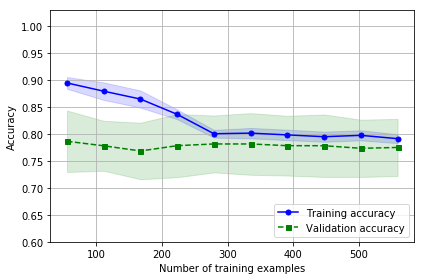

In [114]:
# learning_curve is used for model evaluation

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=lr_pipe,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.6, 1.03])
plt.tight_layout()
# plt.savefig('images/06_05.png', dpi=300)
plt.show()

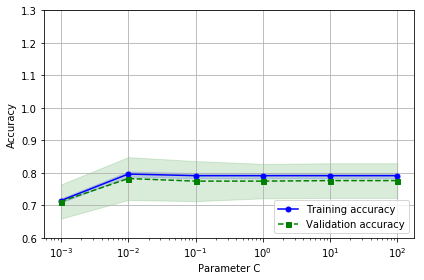

In [115]:
# Used for improving the performance of a model by addressing issues such as overfitting or underfitting

param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(
                estimator=lr_pipe, 
                X=X_train, 
                y=y_train, 
                param_name='logisticregression__C', 
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='Training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='Validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.6, 1.3])
plt.tight_layout()
# plt.savefig('images/06_06.png', dpi=300)
plt.show()

## 6.1 Grid Search

In [119]:
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'logisticregression__C': param_range}]

gslr = GridSearchCV(estimator=lr_pipe,
                   param_grid=param_grid,
                   scoring='accuracy',
                   refit=True,
                   cv=10,
                   n_jobs=-1)

gslrf = gslr.fit(X_train, y_train)
print(gslrf.best_score_)
print(gslrf.best_params_)

0.7829581993569131
{'logisticregression__C': 0.01}


In [120]:
gslrfb = gslrf.best_estimator_

In [121]:
gslrfb.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('pipeline', Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True))])), ('logisticregression', LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=123, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False))])

In [122]:
print("accurcy: ", gslrfb.score(X_test, y_test))

accurcy:  0.8164794007490637
